In [43]:
# importing the dependencies
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.metrics import roc_auc_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve,learning_curve

In [44]:
# get the data
# Loading the dataset
df = pd.read_pickle('../DataFrames/Scaled_label_encoded')

In [45]:
# seperating only the train set
train_set,test_set =  df.iloc[:28322],df.iloc[28322:]

In [46]:
# Making X and y
X = train_set.drop(columns=['label','id'],axis=1)
y = train_set['label']

In [47]:
X.shape,y.shape

((28322, 28), (28322,))

In [48]:
X.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,1,1,0,1,3,3,1,0,1,1,...,0.191410,-0.069827,0.507995,-0.751400,-0.524596,-1.345877,0,0,0.456931,5
1,1,1,1,1,3,3,1,1,1,1,...,-0.299439,0.070979,-0.684627,0.676945,0.030085,0.108731,0,0,-0.368255,3
2,1,1,1,1,3,3,1,0,1,1,...,-0.286682,-0.621706,-0.695462,-0.561508,-0.886183,0.905106,0,0,-0.957226,2
3,0,1,1,1,3,3,1,0,1,1,...,-0.812766,-1.347471,-0.790098,0.896088,-0.628702,-1.405135,0,0,-1.192967,4
4,1,0,1,1,1,3,3,1,2,1,...,0.060300,-0.758957,-0.087675,-0.733322,-0.844228,-0.537021,0,1,0.824896,1


In [49]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [50]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42,shuffle=True
)

In [51]:
# skf and rf
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
rfc = RandomForestClassifier(random_state=42,n_jobs=-1)

In [52]:
cross_val_score(rfc,X_train,y_train,cv=skf,scoring='roc_auc')

array([0.87048488, 0.86332186, 0.86044057, 0.85071694, 0.8553741 ])

In [53]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [54]:
# on train set
rfc_pred = rfc.predict(X_train)
roc_auc_score(y_train,rfc_pred)

1.0

In [55]:
rfc_pred = rfc.predict(X_test)
roc_auc_score(y_test,rfc_pred)

0.7150781477815994

Learning Curve

In [56]:
# Helper function
alphas = np.logspace(-2, 0, 20)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

In [57]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05,1,20)
    N_train,val_train,val_test = learning_curve(
        rfc,X_train,y_train,train_sizes=train_sizes,cv=skf,shuffle=True,scoring='roc_auc'
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);

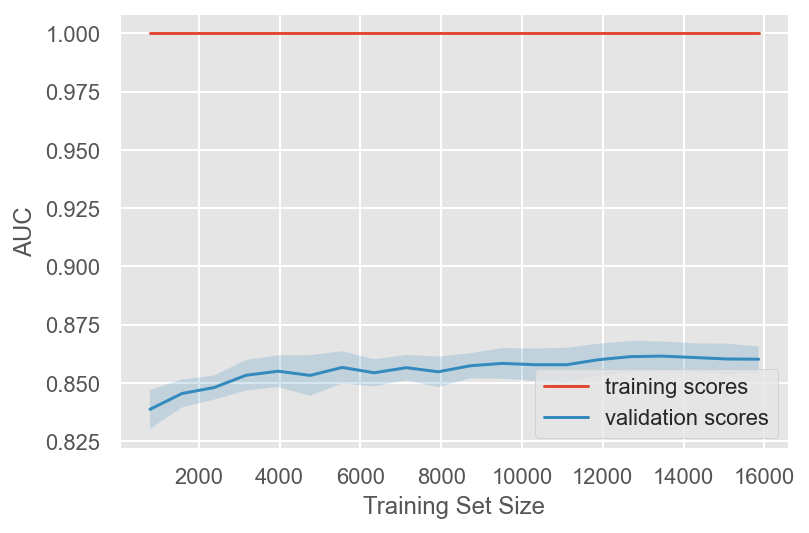

In [58]:
plot_learning_curve()

Validation Curves

In [59]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

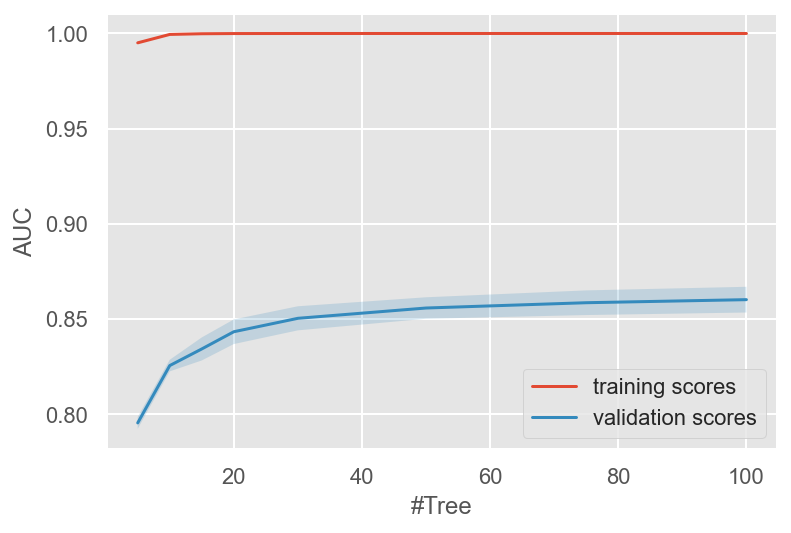

In [60]:
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='n_estimators',
    param_range=trees_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(trees_grid, val_train, label="training scores")
plot_with_err(trees_grid, val_test, label="validation scores")
plt.xlabel("#Tree")
plt.ylabel("AUC")
plt.legend()
plt.grid(True);

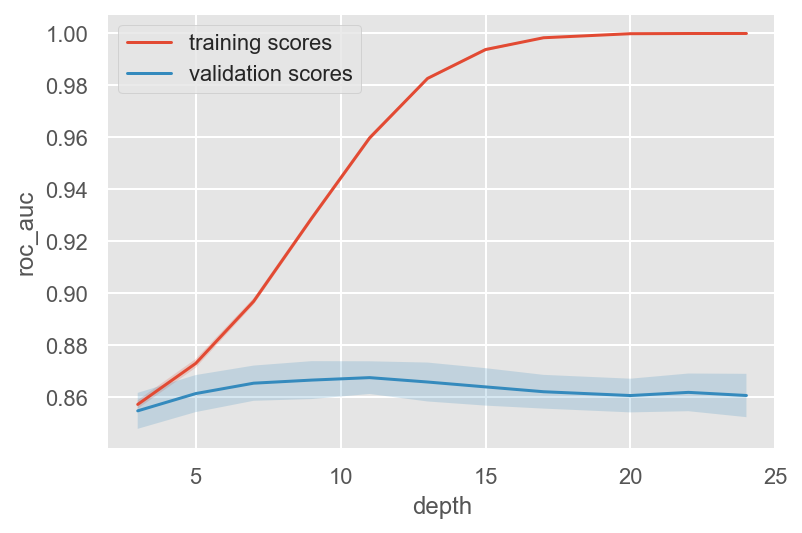

In [61]:
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='max_depth',
    param_range=max_depth_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(max_depth_grid, val_train, label="training scores")
plot_with_err(max_depth_grid, val_test, label="validation scores")
plt.xlabel("depth")
plt.ylabel("roc_auc")
plt.legend()
plt.grid(True);

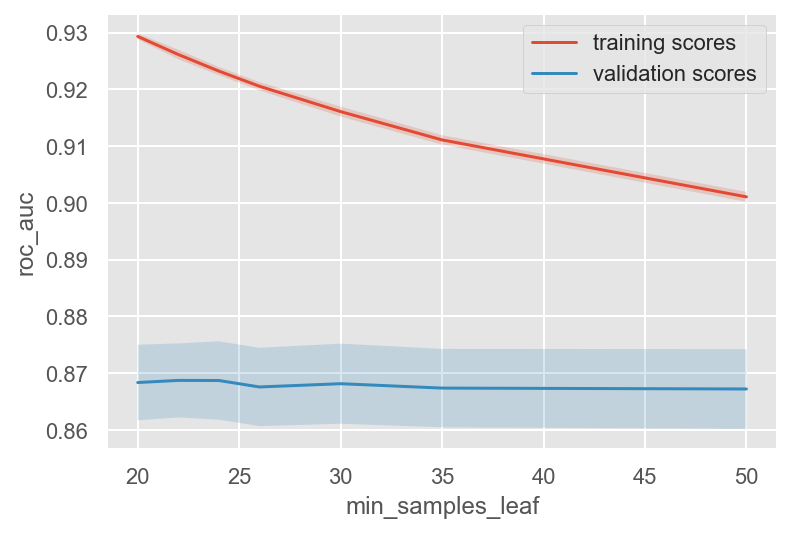

In [62]:
min_samples_leaf_grid = [20, 22, 24, 26,30,35,50]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='min_samples_leaf',
    param_range=min_samples_leaf_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(min_samples_leaf_grid, val_train, label="training scores")
plot_with_err(min_samples_leaf_grid, val_test, label="validation scores")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.grid(True);

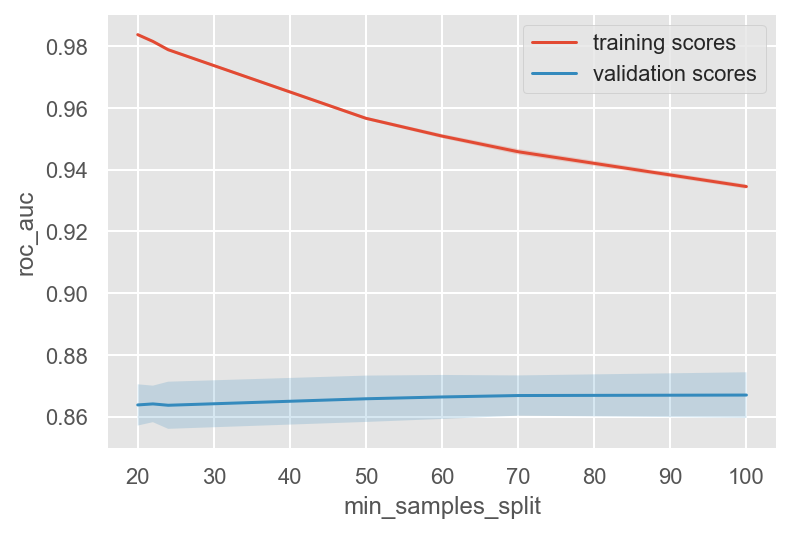

In [63]:
min_samples_split_grid = [ 20, 22, 24,50,60,70,100]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='min_samples_split',
    param_range=min_samples_split_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(min_samples_split_grid, val_train, label="training scores")
plot_with_err(min_samples_split_grid, val_test, label="validation scores")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.grid(True);

Hyperparameter Tuning

In [64]:
forest_params = {
    'max_depth':[1,2,3,4],
    'min_samples_leaf': np.arange(30,60,5),
    'min_samples_split': np.arange(70,100,6)
}

rfc = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
gcv = GridSearchCV(rfc,forest_params,n_jobs=-1,cv=skf,scoring='roc_auc',verbose=1)

In [65]:
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': array([30, 35, 40, 45, 50, 55]),
                         'min_samples_split': array([70, 76, 82, 88, 94])},
             scoring='roc_auc', verbose=1)

In [66]:
gcv.best_score_

0.8582577325153713

In [67]:
gcv.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=70,
                       n_jobs=-1, random_state=42)

In [68]:
forest_pred = gcv.best_estimator_.predict(X_test)

In [69]:
roc_auc_score(y_test,forest_pred)

0.6859828430972467

In [70]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05,1,20)
    N_train,val_train,val_test = learning_curve(
        gcv.best_estimator_,X_train,y_train,train_sizes=train_sizes,cv=skf,shuffle=True,scoring='roc_auc'
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);

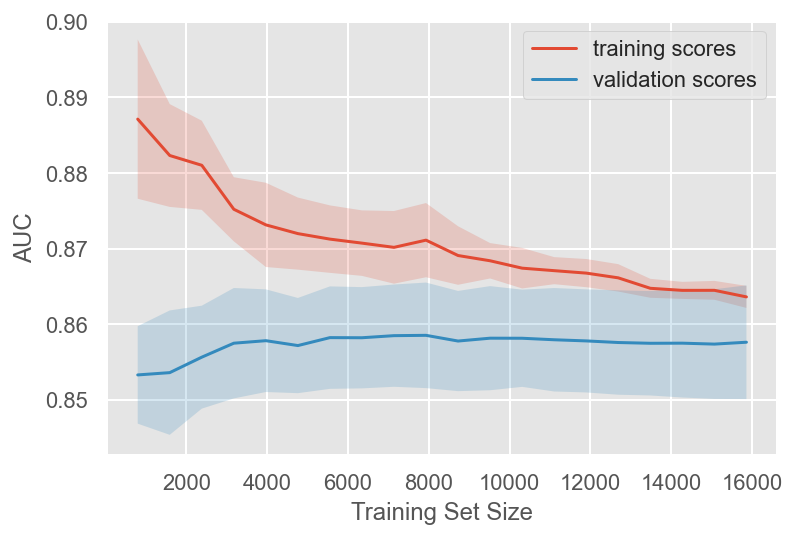

In [71]:
plot_learning_curve()

In [72]:
gcv.best_score_

0.8582577325153713

In [73]:
# Feature Importance
importances = gcv.best_estimator_.feature_importances_

In [74]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importance = pd.Series(importances,index=feature_names)

In [75]:
forest_importance.sort_values(ascending=False)

feature 10    0.207164
feature 4     0.206094
feature 8     0.139299
feature 12    0.108674
feature 6     0.103653
feature 17    0.036665
feature 7     0.034609
feature 5     0.026268
feature 1     0.024657
feature 18    0.023349
feature 13    0.015197
feature 11    0.014689
feature 14    0.013594
feature 0     0.013504
feature 20    0.011622
feature 3     0.006079
feature 15    0.004002
feature 22    0.003408
feature 19    0.002661
feature 16    0.002300
feature 21    0.001896
feature 23    0.000400
feature 26    0.000186
feature 27    0.000032
feature 9     0.000000
feature 2     0.000000
feature 24    0.000000
feature 25    0.000000
dtype: float64

### File Submission

In [76]:
for_predict = test_set.drop(['id','label'],axis=1)

In [77]:
prediction = gcv.best_estimator_.predict(for_predict)

In [78]:
prediction.shape

(85065,)

In [79]:
prediction = pd.Series(prediction).astype('int32')

In [80]:
prediction.head()

0    1
1    1
2    0
3    0
4    0
dtype: int32

In [81]:
prediction = pd.concat([test_set['id'],prediction],axis=1)

In [82]:
prediction = prediction.rename(columns={0:'label'})

In [83]:
prediction.to_csv('../Data/prediction.csv',index=False)